In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('./datasets/digit-recognizer/train.csv');


In [2]:
print(data.shape)
labels=data["label"]
d=data.drop("label",axis=1)



(42000, 785)


In [3]:
print(labels.shape)
print(d.shape)

(42000,)
(42000, 784)


8


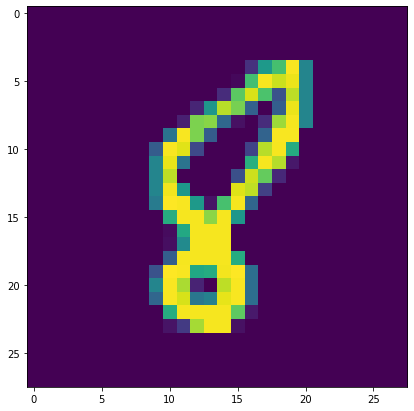

In [4]:
plt.figure(figsize=(7,7))
idx=106
grid_data=d.iloc[idx].to_numpy().reshape(28,28);
plt.imshow(grid_data, interpolation = "none")
print(labels[idx])
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
scale_data=StandardScaler().fit_transform(d);
print(scale_data.shape)

(42000, 784)


In [6]:
covar_mat=scale_data.T.dot(scale_data)
# alternative way to multiply 2 matrix => covar_mat=np.matmul(scale_data.T,scale_data)
print(covar_mat.shape)

(784, 784)


In [7]:
from scipy.linalg import eigh
eignVal,eignVec = eigh(covar_mat,eigvals=(782,783))
print(eignVec.shape)
eignVec=eignVec.T
print(eignVec.shape)

(784, 2)
(2, 784)


In [8]:
final_mat=np.matmul(eignVec,scale_data.T)
print(final_mat)

[[-5.2264454   6.03299601 -1.70581328 ...  7.07627667 -4.34451279
   1.55912058]
 [-5.14047772 19.29233234 -7.64450341 ...  0.49539137  2.30724011
  -4.80767022]]


In [9]:
new_coordinates=np.vstack((final_mat,labels)).T
dataframe=pd.DataFrame(data=new_coordinates,columns=("2nd_principal","1st_principal","labels"))
print(dataframe.head())

   2nd_principal  1st_principal  labels
0      -5.226445      -5.140478     1.0
1       6.032996      19.292332     0.0
2      -1.705813      -7.644503     1.0
3       5.836139      -0.474207     4.0
4       6.024818      26.559574     0.0


/home/sambhav/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


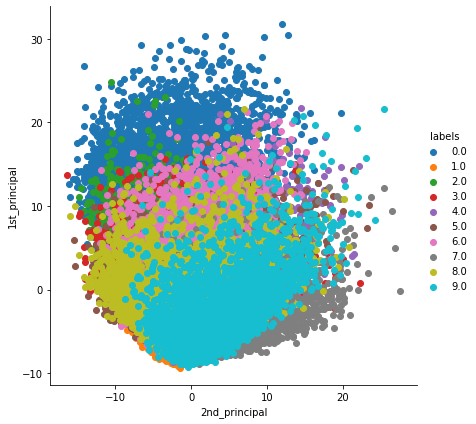

In [12]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="labels",size=6).map(plt.scatter,"2nd_principal","1st_principal").add_legend()
plt.show()

# PCA using inbuilt library

In [19]:
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=2;
pca_data=pca.fit_transform(scale_data)

print(pca_data)

print(pca_data.shape,labels.shape)

[[-5.14040024 -5.22718227]
 [19.29231018  6.03297891]
 [-7.64457328 -1.70544156]
 ...
 [ 0.49536946  7.07613475]
 [ 2.30725458 -4.34436164]
 [-4.80759876  1.55891864]]
(42000, 2) (42000,)


   1st_principal  2nd_principal  labels
0      -5.140400      -5.227182     1.0
1      19.292310       6.032979     0.0
2      -7.644573      -1.705442     1.0
3      -0.474226       5.836395     4.0
4      26.559578       6.024697     0.0


/home/sambhav/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


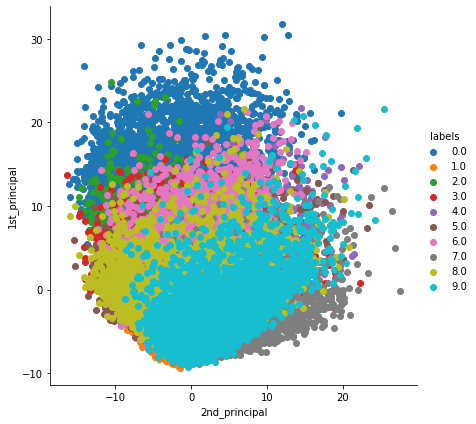

In [22]:
new_c=np.vstack((pca_data.T,labels)).T
df=pd.DataFrame(data=new_c,columns=("1st_principal","2nd_principal","labels"))
print(df.head())

import seaborn as sn
sn.FacetGrid(df, hue="labels",size=6).map(plt.scatter,"2nd_principal","1st_principal").add_legend()
plt.show()